In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
from patsy import dmatrices
import warnings 
warnings.filterwarnings('ignore')

In [28]:
df = pd.read_csv('./csv파일/데이터셋_4(심각도).csv',encoding='cp949')

In [30]:
df

,사고유형,연령가해자,법규위반가해자,행동유형가해자,피해자신체상해주부위,차량용도가해자,도로종류,도로형태,도로선형,발생시각,심각도
0,횡단중,65세이상,그룹1,그룹2,그룹5,그룹4,시도,단일로,평지,출퇴근시간,1
1,횡단중,51-60세,그룹1,그룹3,그룹4,그룹1,시도,교차로,평지,저녁~자정,1
2,길가장자리구역통행중,31-40세,그룹1,그룹3,그룹3,그룹4,시도,단일로,평지,낮,1
3,횡단중,41-50세,그룹1,그룹2,그룹4,그룹1,시도,단일로,평지,출퇴근시간,1
4,횡단중,51-60세,그룹2,그룹3,그룹4,그룹1,시도,교차로,평지,낮,1
...,...,...,...,...,...,...,...,...,...,...,...
27279,횡단중,31-40세,그룹1,그룹2,그룹5,그룹4,시도,교차로,평지,낮,1
27280,횡단중,41-50세,그룹1,그룹3,그룹5,그룹2,군도,교차로,평지,출퇴근시간,1
27281,횡단중,41-50세,그룹2,그룹3,그룹5,그룹1,시도,교차로,평지,출퇴근시간,1
27282,길가장자리구역통행중,51-60세,그룹1,그룹2,그룹2,그룹4,시도,단일로,평지,낮,0


In [34]:
x=df.drop(['심각도'],axis=1)
x = pd.get_dummies(x,drop_first=True)
y=pd.DataFrame(df['심각도'])

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,shuffle=True) 

# 로지스틱 모델을 활용한 예측모델 생성

In [35]:
log = LogisticRegression()
log.fit(x_train,y_train)

y_pred = log.predict(x_test)

### ▶ 정밀도(precision): 63% , 재현율(recall): 53%, 정확도(accuracy): 73%

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.52      0.10      0.17      2192
           1       0.75      0.96      0.84      5994

    accuracy                           0.73      8186
   macro avg       0.63      0.53      0.51      8186
weighted avg       0.68      0.73      0.66      8186



In [38]:
pd.DataFrame(y_pred) # 값을 전부 다 뽑아서 보면 0또는 1로 예측된 값 확인 가능

,0
0,1
1,1
2,1
3,1
4,0
...,...
8181,1
8182,1
8183,1
8184,1


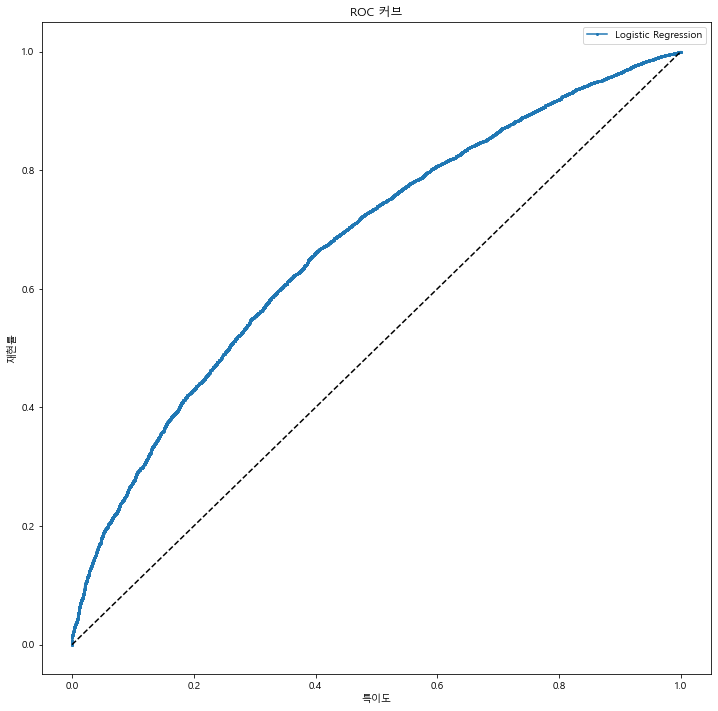

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams
rcParams['figure.figsize'] = 12,12


from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)


fpr, tpr, threshold = roc_curve(y_train, log.decision_function(x_train))

plt.plot(fpr,tpr, 'o-', ms=2, label="Logistic Regression")
plt.legend()
plt.plot([0,1],[0,1], 'k--',label='radom guess')
plt.xlabel('특이도')
plt.ylabel('재현률')
plt.title('ROC 커브')
plt.show()

#### AUC 값은 0.5~1의 범위를 가지는데 0.5면 성능이 전혀 없음. 1이면 최고의 성능이라고 할 수 있다.

In [40]:
print('AUC: {}'.format(auc(fpr,tpr)))  # 0.5에 가까울 수록 성능이 좋지 못함

AUC: 0.6750361193700047


# 로지스틱 회귀 모델 생성 및 평가
#### ▷ R값이 작게나왔지만, 로지스틱 회귀분석은 보통 R제곱값이 낮게 나온다.  따라서R제곱에 의존할 필요는 없다.


In [41]:
import statsmodels.api as sm

logit = sm.Logit(y_train,x_train)
result = logit.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.545095
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                    심각도   No. Observations:                19098
Model:                          Logit   Df Residuals:                    19063
Method:                           MLE   Df Model:                           34
Date:                Tue, 08 Dec 2020   Pseudo R-squ.:                 0.06581
Time:                        17:35:21   Log-Likelihood:                -10410.
converged:                       True   LL-Null:                       -11144.
Covariance Type:            nonrobust   LLR p-value:                1.100e-286
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
사고유형_보도통행중         0.2622      0.100      2.609      0.009       0.065       0.459
사고유형_차도통행중       

# P > 0.05 인 유의하지 않은 변수 삭제

In [42]:
x = x.drop(['연령가해자_21-30세','연령가해자_31-40세','연령가해자_41-50세','연령가해자_51-60세','연령가해자_61-64세'
           ,'연령가해자_65세이상','행동유형가해자_그룹4','피해자신체상해주부위_그룹2','차량용도가해자_그룹2'
           ,'도로종류_군도','도로종류_시도','도로종류_일반국도','도로종류_지방도','도로형태_단일로','도로형태_주차장'
           ,'도로선형_오르막'],axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,shuffle=True) 

# 다시 Logistic

In [43]:
logit = sm.Logit(y_train,x_train)
result = logit.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.547487
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                    심각도   No. Observations:                19098
Model:                          Logit   Df Residuals:                    19079
Method:                           MLE   Df Model:                           18
Date:                Tue, 08 Dec 2020   Pseudo R-squ.:                 0.06171
Time:                        17:36:40   Log-Likelihood:                -10456.
converged:                       True   LL-Null:                       -11144.
Covariance Type:            nonrobust   LLR p-value:                2.787e-281
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
사고유형_보도통행중         0.2339      0.098      2.377      0.017       0.041       0.427
사고유형_차도통행중       

# '법규위반가해자_그룹2' , '행동유형가해자_그룹3' 삭제 

In [44]:
x = x.drop(['법규위반가해자_그룹2','행동유형가해자_그룹3'],axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,shuffle=True) 
logit = sm.Logit(y_train,x_train)
result = logit.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.543927
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                    심각도   No. Observations:                19098
Model:                          Logit   Df Residuals:                    19081
Method:                           MLE   Df Model:                           16
Date:                Tue, 08 Dec 2020   Pseudo R-squ.:                 0.06216
Time:                        17:38:15   Log-Likelihood:                -10388.
converged:                       True   LL-Null:                       -11076.
Covariance Type:            nonrobust   LLR p-value:                1.409e-283
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
사고유형_보도통행중         0.2871      0.096      2.987      0.003       0.099       0.476
사고유형_차도통행중       

---

# 오즈비 확인
#### ▶ 독립변수들의 오즈비를 구해보자
#### ▶ 오즈비는 1을 기준으로 1보다 크면 심각한사고일 확률이 커지고 1보다 작으면 심각하지 않은 사고 일 확률이 커진다는 것을 나타낸다. 
#### ▶ 오즈비가 1 이면 결과에 별다른 영향을 미치지 않는 다고 볼 수 있다.
#### ▶ 회귀계수가 변수의 오즈비의 로그값이므로 exp을 취해서 보자

In [45]:
print(np.exp(result.params))

사고유형_보도통행중         1.332594
사고유형_차도통행중         1.167932
사고유형_횡단중           1.576486
법규위반가해자_그룹3       39.703150
행동유형가해자_그룹2        1.217637
피해자신체상해주부위_그룹3     1.554190
피해자신체상해주부위_그룹4     2.436230
피해자신체상해주부위_그룹5     3.384983
피해자신체상해주부위_그룹6     6.452468
차량용도가해자_그룹3        0.669146
차량용도가해자_그룹4        0.796767
차량용도가해자_그룹5        0.477874
도로종류_특별광역시도        0.820840
도로선형_평지            0.806067
발생시각_새벽~아침         1.860350
발생시각_저녁~자정         1.269422
발생시각_출퇴근시간         1.199479
dtype: float64


### 오즈비 결과에 따르면 다음 순서로 심각한 사고를 일으킬 확률이 높다. 
#### 1. 법규위반가해자_그룹3 (39.703150) 
##### 그룹3: 과속
#### 2. 피해자신체상해주부위_그룹6  (6.452468)
##### 그룹6: 가슴 
#### 3. 피해자신체상해주부위_그룹5 (3.384983)
##### 그룹5: 배, 머리, 대퇴부
#### 4. 피해자신체상해주부위_그룹4 (2.436230)
##### 그룹4: 하퇴부, 얼굴, 발
#### 5. 발생시각_새벽~아침 (1.860350)
##### 새벽~아침: 02-04시, 05-07시

# Logistic 모델 성능 재평가
### ▶ 정밀도(precision): 65% , 재현율(recall): 53%, 정확도(accuracy): 73%

In [46]:
log.fit(x_train,y_train)
y_pred = log.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.09      0.16      2259
           1       0.74      0.97      0.84      5927

    accuracy                           0.73      8186
   macro avg       0.65      0.53      0.50      8186
weighted avg       0.69      0.73      0.65      8186



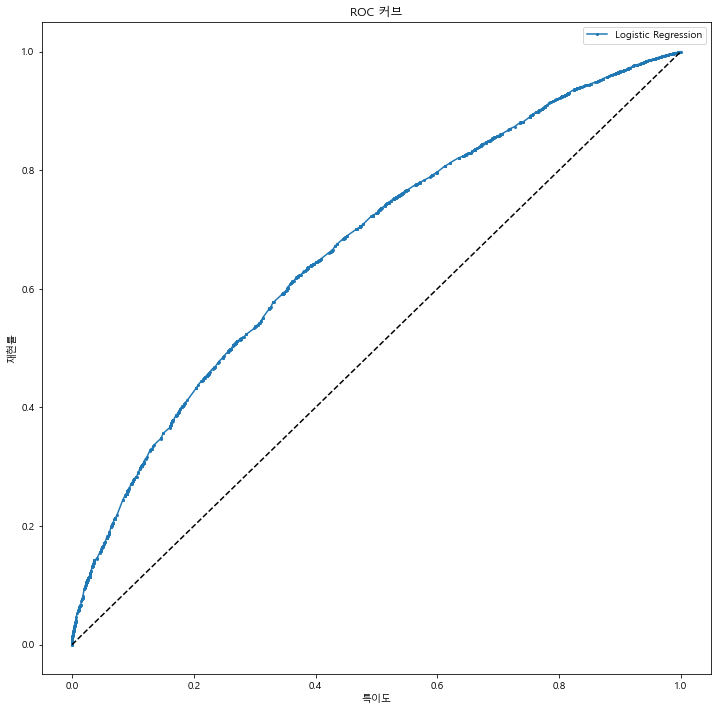

In [47]:
fpr, tpr, threshold = roc_curve(y_train, log.decision_function(x_train))

plt.plot(fpr,tpr, 'o-', ms=2, label="Logistic Regression")
plt.legend()
plt.plot([0,1],[0,1], 'k--',label='radom guess')
plt.xlabel('특이도')
plt.ylabel('재현률')
plt.title('ROC 커브')
plt.show()

In [48]:
print('AUC: {}'.format(auc(fpr,tpr)))  # 0.5에 가까울 수록 성능이 좋지 못함

AUC: 0.6695826193918234


---

---

---

# ※그룹핑 기준 참고 (anova 결과에 따라 묶음)

## 3. 법규위반가해자
#### 교차로 통행방법 위반, 안전거리 미확보, 안전운전 의무 불이행 - 그룹1
#### 신호위반, 보행자 보호의무 위반, 중앙선 침범 - 그룹2
#### 과속 - 그룹3
## 4. 행동유형가해자
#### 후진중, 출발중 -그룹1
#### 진로변경중, 직진중 - 그룹2
#### 좌우회전중, 앞지르기중, U턴중 - 그룹3
#### 주행 중 대기, 주정차중 - 그룹4
## 5. 피해자신체상해주부위
#### 상해없음 - 그룹1
#### 팔, 앞목, 목, 뒷목 - 그룹2
#### 허리, 어깨, 손, 등 - 그룹3
#### 하퇴부, 얼굴, 발 - 그룹4
#### 배, 머리, 대퇴부 - 그룹5
#### 가슴 - 그룹6
## 6. 차량용도가해자
#### 화물차, 택시, 전세버스, 기타/건설기계- 그룹1
#### 특수여객(장의), 콘크리트믹서, 위험물운송, 덤프트럭, 농기계, 노선버스 - 그룹2
#### 이륜차, 원동기장치자전거, 어린이통학버스, 사륜오토바이(ATV) 그룹3
#### 승용차, 사업용기타, 비사업용기타, 버스, 렌터카 - 그룹4
#### 개인형이동수단(PM), 자전거 - 그룹5

## 10. 발생시각
#### 02-04시, 05-07시 - 그룹1 (새벽~아침)
#### 08-10시, 17-19시 - 그룹2 ( 출퇴근 시간)
#### 11-13시, 14-16시 - 그룹3 (낮)
#### 20-22시, 23-01시 - 그룹4 (저녁~자정